# 파이썬으로 풀어보는 수학

- 원서명 : Doing Math with Python: Use Programming to Explore Algebra, Statistics, Calculus, and More! (ISBN 9781593276409)
- 지은이 : 아미트 사하(Amit Saha)
- 원서 및 관련자료 : <https://www.nostarch.com/doingmathwithpython>
- 번역서 : <http://www.acornpub.co.kr/book/doing-math-with-python>

![책표지](./image/cover.jpg)

## 7장 미적분 문제 풀기

### 1.  함수란 무엇인가 ?

`함수`란 입력집합과 출력집합 간의 관계(mapping)를 얘기합니다.
유요한 입력값의 집합을 함수 `도메인(Domain)`이라 하고, 결과집합을 `범위(Range)`라고 합니다.
예를 들어서 $f(x)=\frac {1}{x}$ 라는 함수가 있는 경우 x의 값은 0이 될 수 없습니다.
그러므로 이 함수의 도메인은 0이 아닌 모든 실수와 복소수 입니다.
결과집합인 범위도 0이 아닌 모든 실수와 복소수 입니다.
$f(x)={x}^{2}$에 대해서는 도메인은 모든 양수와 음수이지만, 범위는 양수만 해당합니다.

### 2. 가정(assumptions)

`sympy`의 `Symbol`객체를 이용를 생성한 다음 해당 변수의 값을 가정하고 판단하는 것이 가능합니다.
$x+5$ 값이 0보다 큰지 여부를 확인하는 코드를 작성해 보겠습니다.

In [1]:
from sympy import Symbol

x = Symbol('x')
if x + 5 > 0:
    print('Positive')
else:
    print('Negative')

TypeError: cannot determine truth value of Relational

`TypeError: cannot determine truth value of Relational`라는 오류가 발생합니다.
왜냐면 x의 값이 범위를 알 수 없으므로 해당 식이 0보다 큰지 작은지 추론을 할 수가 없기 때문입니다.
`Symbol` 객체를 `positive=True`로 설정하면 해당 식은 항상 0보다 클 것입니다.

In [2]:
x = Symbol('x', positive=True)
if x + 5 > 0:
    print('Positive')
else:
    print('Negative')

Positive


`negative=True`로 선택하면 참, 거짓이 모두 가능하기 때문에 처음과 같은 `TypeError: cannot determine truth value of Relational` 오류가 발생합니다.

In [3]:
x = Symbol('x', negative=True)
if x + 5 > 0:
    print('Positive')
else:
    print('Negative')

TypeError: cannot determine truth value of Relational

앞에서 살펴본 `positive`, `negative` 외에도 `real`, `integer`, `complex`, `imaginary` 등으로 설정이 가능합니다.

### 3. 함수의 극한

미적분 계산의 기본은 변수의 값이 어떤값에 근접할 때의 함수의 극한값을 찾는 것입니다.
$f(x)=\frac{1}{x}$ 함수의 경우 x가 증가할수록 0에 가까워 집니다.

![수식 추의주기](./image/DoingMathWithPython.Ch07.equation.01.png)

`sympy`에서는 극한을 `Limit` 객체를 이용해서 생성이 가능합니다.

In [5]:
from sympy import Limit, Symbol, S

x = Symbol('x')
L = Limit(1/x, x, S.Infinity)
L

Limit(1/x, x, oo, dir='-')

극한값 계산에는 `doit()`함수를 사용합니다.

In [6]:
L.doit()

0

0의 방향으로 극한값은 양의 방향에서 0으로 접근을하면 양의 무한대 값이 되며, 음의 방향에서 0으로 접근하면 양의 무한대 값이 됩니다.

In [7]:
Limit(1/x, x, 0, dir='-').doit()

-oo

In [8]:
Limit(1/x, x, 0, dir='+').doit()

oo

정해지지 않은 극한값도 다룰수 있습니다. ($\frac { 0 }{ 0 } =\frac { \infty  }{ \infty  } =1$)

In [9]:
from sympy import sin

Limit(sin(x)/x, x, 0).doit()

1

### 4. 연속 복리

이자율 `r`에 대해서 기간 `n` 동안의 복리이자를 계산하는 수식은 다음과 같습니다.

$$A = {(1+r)}^{n}$$

여기에서 *r*을 $\frac { 1 }{ n } $로 치환을 한 후 *n*값을 무한대 값으로 극한을 취하면 *e*값에 접근합니다.(${ \left( 1+\frac { 1 }{ n }  \right)  }^{ n }$)

In [2]:
from sympy import Limit, Symbol, symbols, S

n = Symbol('n')
Limit((1+1/n)**n, n, S.Infinity).doit()

E

원금 `P`, 이자율 `r`, 기간 `t`에 대한 복리이자는 다음 공식을 이용합니다.

$$ A=P{(1+ \frac {r}{n}})^{nt}$$

In [3]:
p, r, t = symbols('p,r,t')
A = Limit(p*(1+r/n)**(n*t), n, S.Infinity).doit()
A

p*exp(r*t)

저 수식이 맞는지 계산해보겠습니다.
100만원을 복리 3% 이자 10년동안 예치한 경우 수령액을 계산해 보겠습니다.
저 수식이 맞는지 우리가 일반적으로 알고있는 수식으로 계산한 값과 비교해 보겠습니다.

In [12]:
A.subs({p:1000000, r:0.03, t:10})

1349858.80757600

In [14]:
A2 = p * (1+r)**t
A2.subs({p:1000000, r:0.03, t:10})

1343916.37934412

완벽하게 일치하지는 않지만 큰 차이는 없습니다.

#### 실시간 변화율

어떤 자동차의 이동거리를 계산하는 수식이 $S(t)={5t}^{2} + 2t + 8$라고 가정을 해봅시다.
시간의 제곱에 비례를 한다는 것을 보면 시간이 지날수록 점점 속도가 빨라지고 있다고 생각할 수 있습니다.

이 함수의 독립변수는 `t`입니다.
특정 시간동안 (`t1`시간에서 `t2`시간까지)의 단위시간당 이동한 거리를 다음 수식으로 계산이 가능합니다.

![수식](./image/DoingMathWithPython.Ch07.equation.02.png)

여기서 `t2`와 `t1`간의 시간차이를 `∂`라 할경우 수식을 다음과 같이 표현이 가능하며,

![수식](./image/DoingMathWithPython.Ch07.equation.03.png)

여기서 `∂`를 0에 근접시키는 극한값은 다음과 같습니다.

![수식](./image/DoingMathWithPython.Ch07.equation.04.png)

`sympy`를 이용해서 극한값을 구해보겠습니다.

In [21]:
t, t1, delta_t = symbols('t,t1,delta_t')

S = 5*t**2 + 2*t + 8
L = (S.subs({t:t1 + delta_t}) - S.subs({t:t1})) / delta_t
Limit(L, delta_t, 0).doit()

10*t1 + 2

극한 계산 결과는 특정시간 `t1`에 대한 `S(t)`의 `변화율`입니다.
즉, `t`에 대한 `가속도`라 할 수 있으며,
$S(t)={5t}^{2} + 2t + 8$ 함수의 `미분`값이 됩니다.

### 5. 함수의 미분(differential) 계산

함수 `y=f(x)`의 미분은 독립변수 `x`에 대한 종속변수 `y`의 변화율을 계산하는 식입니다.
미분은 `f'(x)`나 $dy/dx$로 표현합니다.
`sympy`의 `Derivative` 객체를 이용하여 미분을 계산 할 수 있습니다.

In [23]:
from sympy import Derivative

D = Derivative(S, t)
D

Derivative(5*t**2 + 2*t + 8, t)

In [25]:
Sd = D.doit()
Sd

10*t + 2

In [26]:
Sd.subs({t:t1})

10*t1 + 2

In [27]:
Sd.subs({t:1})

12

사용자에게 수식을 입력받아서 해당 수식의 미분을 출력하는 프로그램을 작성해 보겠습니다.

In [3]:
from sympy import Derivative, Symbol, sympify, pprint
from sympy.core.sympify import SympifyError

def GetDifferential(f, x): return Derivative(f, x).doit()

def DifferentialCalcuator():    
    f = input('Enter a function :')
    x = input('Enter the variable to differentiate with respect to:')
    try:
        f = sympify(f)
        x = Symbol(x)
    except SympifyError:
        print('Invalid Input')
    else:
        pprint(GetDifferential(f,x))

In [4]:
DifferentialCalcuator()

Enter a function :2*x**2 + 3*x + 1
Enter the variable to differentiate with respect to:x
4⋅x + 3


변수가 2개 이상인 경우에도 정상적으로 동작하는지 확인해 보겠습니다.
다중 변수로 이루어진 함수에서 특정 한 개의 변수만을 대상으로 미분을 하는 것을 `편미분(partial differentiation)`이라 합니다.

In [5]:
DifferentialCalcuator()

Enter a function :2*x**2 + 3*y**2 + 6*x*y + 3
Enter the variable to differentiate with respect to:x
4⋅x + 6⋅y


### 6. 고차 미분과 최대, 최소값 구하기

`Derivative` 클래스를 이용하면 기본적으로는 1차 미분의 결과가 생성됩니다.
고차 미분을 계산하려면 3번째 인자의 값으로 미분차수를 설정하면 됩니다.

이번에는 특정 함수에서 어떤 구간에서의 최대, 최소값을 계산하기 위해서 1차와 2차 미분을 사용하는 방법을 알아보겠습니다.

$${x}^{5} - {30x}^{3} + 50x$$

위 함수에서 `[-5, 5]` 영역에서의 최대값과 최소값을 구해보겠습니다.

In [4]:
%matplotlib inline
import seaborn

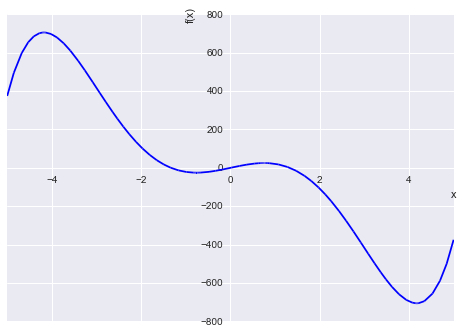

In [5]:
from sympy.plotting import plot
from sympy import Symbol

x = Symbol('x')
y = x**5 - 30*x**3 + 50*x
plot(y,(x,-5,5))

그래프를 참고하면 $-2\le x\le 0$에서 지역최소값(**B**), $0\le x\le 2$에서 지역최대값(**C**)을 가지며,
$-5\le x\le 5$에서는 전역 최대값, 최소값을 가집니다.
(물론 전체 그래프 영역에서의 전역 최대/최소값은 $\infty , -\infty$ 입니다.)

**극값(extremum)**이란 대상 함수가 해당 지역 (또는 전역)에서 최대값(**A**)이나 최소값(**D**)을 갖는 지점을 의미합니다.
그림으로 보면 극값에서의 기울기는 *0*입니다.
즉, 해당 함수의 미분값 *f'(x) = 0* 을 풀면 됩니다.
이러한 해를 해당 함수의 **임계점**이라 합니다.

In [13]:
from sympy import Derivative, solve, pprint
from sympy import init_printing
init_printing(order='rev-lex')

dy = Derivative(y, x).doit()
dy

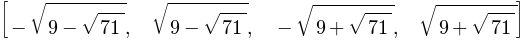

In [14]:
extrema = solve(dy)
extrema

In [17]:
A = extrema[2]
B = extrema[0]
C = extrema[1]
D = extrema[3]

위 4개의 점은 각각 4개의 극값이 됩니다.
위에서 언급한 포인트(**A,B,C,D**)로 대입해 보겠습니다.

2차 미분을 하면 해당 임계점이 전역 최대값, 최소값인지 판단이 가능합니다.

In [15]:
d2 = Derivative(y, x, 2).doit()
d2

여기에 **A,B,C,D** 값을 대입해 보겠습니다.

In [18]:
d2.subs({x:B}).evalf()

In [19]:
d2.subs({x:C}).evalf()

In [20]:
d2.subs({x:D}).evalf()

In [21]:
d2.subs({x:A}).evalf()

모든 임계점을 알고 있는 상태에서 전역 최대값, 최소값은 임계점(A,B,C,D)이나 영역의 끝점(5, -5) 중 한 곳에 존재합니다.
그중 지역 최대값인 A,C는 전역 최소값이 될 수 없으며, 같은 논리로 지역 최소값인 B,D는 전역 최대값이 될 수 없습니다.
이제 도메인 경계값인 (5,-5)를 포함하여 최대,최소값을 구해보겠습니다.

In [22]:
y.subs({x:A}).evalf()

In [23]:
y.subs({x:B}).evalf()

In [24]:
y.subs({x:C}).evalf()

In [25]:
y.subs({x:D}).evalf()

In [26]:
y.subs({x:-5}).evalf()

In [27]:
y.subs({x:5}).evalf()

위 결과로 봐서 A에서 전역 최대값을 가지며, D에서 전역 최소값을 가집니다.

이 방법은 도메인 내 모든 지점에서 1,2차 미분이 가능한 경우 사용이 가능합니다.
${ e }^{ x }$의 경우에는 임계점은 없지만, 1,2차 미분이 가능하므로 극한값은 도메인 경계에서 발생합니다.


### 7. 그레디언트 상승을 이용한 전역 최대값 알아내기

특정 도메인 내가 아닌 해당 함수 전역에 대해서 최대값을 알아보고 싶을 경우가 있습니다.
예를 들어 공을 던졌을 경우 최대 수평거리에 도착시키기 위한 공의 투척각도를 알고 싶을 경우를 가정해 보겠습니다.
그레디언트 상승 메소드를 이용하면 전역 최대값을 찾아 낼 수 있습니다.
이 방법은 1차 미분만을 이용하며 전역 최대값을 찾아내기 위해서 반복적으로 계산을 해서 접근하는 방법입니다.
그러므로 사람이 수작업으로 계산하는 것보다는 프로그램적으로 해결하기에 좋은 방법입니다.

앞서 투척운동에 관련된 수식은 많이 봤으므로 유도과정은 생략하고 바로 수식을 보도록 하겠습니다.
먼저 최대비행시간에 대한 수식입니다.

![최대비행시간](./image/DoingMathWithPython.Ch02.equation.04.png)

수평이동 거리는 속도 X 시간 이므로,

![수식](./image/DoingMathWithPython.Ch07.equation.05.png)

에 대해서 0 ~ 90도 사이에 값에 대해서 계산을 하면 됩니다.
계산상 편의를 위해서 던진 속도 *u*와 중력값 *g*를 1값으로 고정하도록 하겠습니다.

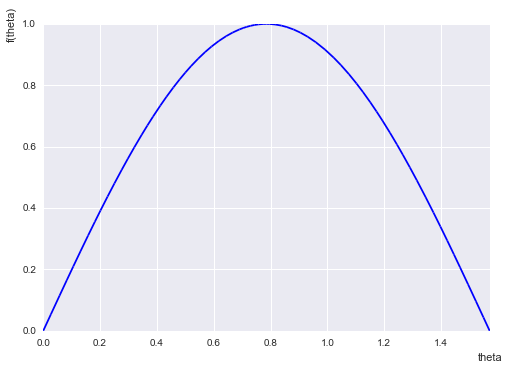

In [28]:
from sympy import Symbol, sin
from sympy.plotting import plot
import math

deg0 = math.radians(0)
deg90 = math.radians(90)

theta = Symbol('theta')
R = sin(2*theta)
plot(R,(theta,deg0,deg90))

눈으로 봤을 경우 45에서 최대도달거리가 최고점인 것을 확인 할 수 있습니다.

이를 그레디어느 상승 메서드 방식으로 풀어보도록 하겠습니다.
초기 *theta* 값을 0.001로 하고 다음 단계의 값은 다음과 같이 계산합니다.

![수식](./image/DoingMathWithPython.Ch07.equation.06.png)

$\lambda$(람다)는 단계의 크기이며, $\frac { dR }{ d\theta  }$는 R을 *theta*에 대해 미분한 값입니다.
이렇게 계산한 ${ \theta  }_{ new }$값과 원래값인 ${ \theta  }_{ old }$값의 차이가 $\varepsilon$(epsilon)보다 크면 계속해서 반복수행하고, 작으면 이 값에 대해 *R*에서의 최대값으로 계산합니다.

이를 프로그램으로 구현해 보겠습니다.

In [29]:
from sympy import Derivative
def grad_ascent_unsafe(func, symbol, start, step, epsilon):
    df = Derivative(func, symbol).doit()
    oldValue = start
    newValue = oldValue + step * df.subs({symbol:oldValue}).evalf()
    while (abs(newValue - oldValue) > epsilon):
        oldValue = newValue
        newValue = oldValue + step * df.subs({symbol:oldValue}).evalf()
    return newValue    

In [30]:
m = grad_ascent_unsafe(R, theta, 1e-3, 1e-4,1e-6)
print(math.degrees(m))

44.85681745360614


거의 45도에 가까운 값이 나옵니다.
초기속도 u = 25 m/s 이며, 중력값 g= 9.8인 경우에서의 최대 거리를 구해보겠습니다.

In [31]:
u = 25
g = 9.8
R = u**2 * sin(2*theta) / g

m = grad_ascent_unsafe(R, theta, 1e-3, 1e-4,1e-6)

print(math.degrees(m))
R.subs({theta:m}).evalf()

44.997815081691805


#### 주의점 1. f'(x)의 해가 여러개 존재할 경우

그런데 앞서 살펴본 ${ x }^{ 5 }-30{ x }^{ 3 }+50x$ 함수에 대해서 그레디언트 상승 메서드를 적용하면 어떻게 될까요 ?
얼핏 생각하더라도 초기값, 진행방향에 따라 각각 다른 결과가 나오리란걸 예상할수 있습니다.

In [47]:
grad_ascent_unsafe(y,x, -5, 1e-3, 1e-6)

-4.17446382061392

In [48]:
grad_ascent_unsafe(y,x, 0, -1e-3, 1e-6)

-0.757522804632242

In [49]:
grad_ascent_unsafe(y,x, 0, 1e-3, 1e-6)

0.757522804632242

In [50]:
grad_ascent_unsafe(y,x, 5, -1e-3, 1e-6)

4.17446382061392

사실상 step 값을 음수(-)로 넣는 다는건 `그레디언트 상승`이 아닌 `그레디언트 하강`이 됩니다.

이 경우에는 함수 전역의 최대값이 아니라 1차미분 값의 크기가 0에 가까운 지점인 지역 최대값,최소값에서도 멈추게 됩니다.

#### 주의점 2. f'(x)의 해가 없는 경우

*log(x)* 나 ${e}^{x}$와 같이 f'(x)의 해가 없는 경우에는 무한루프에 빠져서 프로그램이 종료하지 않을 것입니다.
이런 경우를 판단하여 오류를 발생해 주도록 함수를 수정하겠습니다.

In [51]:
def grad_ascent(func, symbol, start, step, epsilon):
    df = Derivative(func, symbol).doit()
    if not solve(df):
        raise ValueError('Solution for this function does not exist.')
    return grad_ascent_unsafe(func, symbol, start, step, epsilon)

In [54]:
grad_ascent(y,x, -5, 1e-3, 1e-6)

-4.17446382061392

In [56]:
from sympy import log
grad_ascent(log(x), x, 0, 1e-3, 1e-6)

ValueError: Solution for this function does not exist.

### 8. 함수의 적분 계산

적분은 미분의 반대입니다.
함수 `f(x)`의 적분을 `F(x)`로 표현합니다.
특정함수의 미분 결과를 적분하면 원래 함수가 됩니다.
무한적분은 $F(x)=\int { f(x) } dx$로 표시합니다.
하지만 실제로 사용할때는 정적분(difinite integral)로 사용하며 이 값은 `F(b)-F(a)`와 같이 특정 범위내의 적분값을 구해서 계산합니다.
python에서는 `Integral` 객체를 이용해서 적분을 계산할 수 있습니다.

In [32]:
from sympy import Integral, Symbol, symbols

x, k = symbols('x,k')
fx = k*x
Fx = Integral(fx, x).doit()
Fx

정적분을 계산하려면 두번째 인자로 적분할 심볼과 그 범위를 튜플로 전달하면 됩니다.

In [33]:
Fx0_2 = Integral(fx,(x,0,2)).doit()
Fx0_2

위 결과는 $\int _{ 0 }^{ 2 }{ kxdx } $의 결과입니다.

기하학적 측면에서 생각을 해보자면 정적분은 함수에 대한 해당 영역의 넓이를 뜻합니다.
쉽게 손으로 계산이 가능하도록 하기 위해 `f(x)=x`라는 그래프를 생각해 보겠습니다.
이 그래프에서 `x=2` 에서 `x=4`영역의 넓이를 구하려면 해당영역 아래 `2 x 2` 크기의 사각형 1개와 삼각형 1개의 넓이를 더하면 됩니다.
즉 `2 x 2 + 2 x 2 / 2 = 6`이 됩니다.

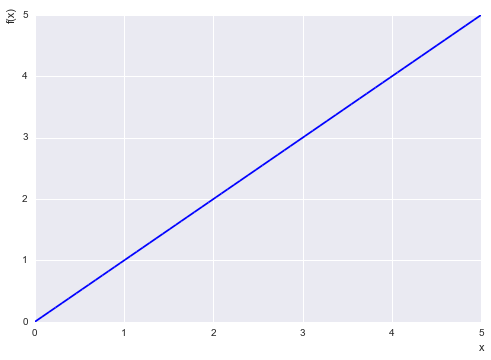

In [34]:
from sympy.plotting import plot
fx = x
plot(fx,(x,0,5))

이 것을 정적분을 이용해서 풀어보겠습니다.

In [6]:
Integral(fx,(x,2,4)).doit()

6

### 9. 확률밀도함수

어떤 과목의 점수를 0 ~ 20 으로 매긴다고 할 경우, 그 과목 학생이 11 ~ 12 사이의 성적을 얻을 확률을 계산해보겠습니다.
일반적인 확률공식으로는 계산이 힘듭니다.
`P(11< x < 12) = n(E) / n(S)` 수식으로 표현을 해보자면 그 경우의 수가 거의 무한대에 가까울 정도로 힘듭니다.
학생 수가 10명만 된다고 하더라도 각 10명이 얻을 수 있는 점수의 범위는 0 ~ 20 이며 이 모든 경우에 수를 다 구해서 그 중 특정 한 명이 11 ~ 12인 경우만 추출해서 계산해야 합니다.
학생 수가 100명만 되어도 상상하기도 싫어집니다.

만약 확률밀도함수 `P(x)`를 알고 있다면 `P(11< x < 12)`를 계산하는 것은 x=11과 x=12 사이의 영역입니다.
이는 정적분값인 $\int _{ 11 }^{ 12 }{ P(x)dx }$와 같습니다.
이 경우의 확률밀도 함수는 다음과 같습니다.

![수식](./image/DoingMathWithPython.Ch07.equation.07.png)

이 식의 정적분을 계산하면 됩니다.

In [9]:
from sympy import exp, sqrt, pi, Integral, Symbol, S

x = Symbol('x')
p = exp(-(x-10)**2/2)/sqrt(2*pi)
Integral(p,(x,11,12)).doit().evalf()

0.135905121983278

확률밀도 함수는 특징을 가집니다.

- 확률은 절대 0보다 작을수 없으므로 모든 영역에서의 결과값은 항상 0보다 크거나 같습니다.
- 전체영역(-Inf ~ Inf)에서의 정적분 값은 1이 됩니다.
- 연속형 랜덤 변수의 특성상 정확한 한 지점의 확률값은 언제나 0 입니다.

In [10]:
Integral(p,(x,S.NegativeInfinity,S.Infinity)).doit().evalf()

1.00000000000000

확률밀도 함수는 연속형 랜덤 변수를 이용하기 때문에 조금은 상식에 맞지 않는 계산결과가 나옵니다.
실제로 가능한 일이더라도 특정한 한 지점에 대한 확률값은 0이 됩니다.
왜냐면 전제 자체가 경우의 수를 무한대로 놓고서 계산을 하기 때문에 계산 결과는 결국 $\frac { 1 }{ \infty  }$이 됩니다.
정적분으로 계산을 하더라도 특정한 지점에 대한 정적분값은 0이 됩니다.
(`F(a) - F(a) = 0`)

In [11]:
Integral(p,(x,11.5,11.5)).doit().evalf()

0

## 프로그래밍 연습

### 1.  한 점에서 함수의 연속 검증

```
입력된 함수의 한 점에 대해서 연속인지 아닌지를 검증하는 프로그램을 작성하세요.
```

함수가 특정한 한 점에서 연속이 되려면 해당 지점에서의 미분값이 존재해야합니다.
이를 극한으로 생각하자면 양쪽방향에서 해당 지점으로 접근한 경우의 값이 같아야 한다는 뜻도 됩니다.
예를 들어서 `1/x`함수에 대해서 2 에서는 연속이지만, 0 에서는 연속적이지 않습니다.

In [24]:
from sympy import Limit
fx = 1/x
Limit(fx, x, 2, dir='+').doit()

1/2

In [25]:
Limit(fx, x, 2, dir='-').doit()

1/2

In [26]:
Limit(fx, x, 0, dir='+').doit()

oo

In [27]:
Limit(fx, x, 0, dir='-').doit()

-oo

위 특징을 이용해서 함수를 만들어 보겠습니다.

In [34]:
from sympy import Limit, sympify, Symbol
def IsContinuous(func, symbol, value):
    rightApproch = Limit(func, symbol, value, dir='-').doit()
    leftApproch = Limit(func, symbol, value, dir='+').doit()
    return rightApproch == leftApproch

def Console_IsContinuous():
    fx = sympify(input('Enter a function:'))
    x = Symbol(input('Enter the variale:'))
    v = float(input('Enter the point to check the continuity at:'))
    print(IsContinuous(fx,x,v))

In [35]:
Console_IsContinuous()

Enter a function:1/x
Enter the variale:x
Enter the point to check the continuity at:1
True


In [36]:
Console_IsContinuous()

Enter a function:1/x
Enter the variale:x
Enter the point to check the continuity at:0
False


### 2. 그레디언트 하강 구현

이미 앞에서 그레디언트 상승 구현을 구현하였습니다. (`grad_ascent` 함수 참조)
그곳에 `step`값을 음수로 넣어주면 그레디언트 하강으로 동작하게 됩니다.
이미 구현된 내용이므로 생략하겠습니다.

### 3.  두 곡선 간 면적

```
입력 받은 단일 변수 2개의 함수에 대해서 둘러쌓인 면적을 계산하세요.
```

그 동안 배운 수학공식을 이용하면 쉽게 해결이 가능합니다.
1. 두 곡선을 입력받음
2. 공통해를 구함
3. 공통해를 순서대로 정렬
4. 각 공통해 구간에서의 각각의 곡선에 대한 적분값을 계산
5. 두 적분값의 차를 구함 (한 값에서 다른 값을 뺀 후 절대값으로 표현)
6. 모든 공통해 사이를 다 계산할때까지 4번부터의 과정을 반복
7. 모든 공통해 사이의 공간들에 대한 계산 결과를 더함

차례대로 하나씩 해보겠습니다.
예제로 `f(x) = x` , `f(x) = x^2`을 이용해서 풀어보겠습니다.

In [73]:
from sympy import Symbol,solve, Integral

x = Symbol('x')
fx1 = x
fx2 = x**2

In [38]:
# 공통해를 구하는 함수
def SolveSimultaneousEquations(func1, func2):
    func = func1 - func2
    return solve(func)

In [41]:
result = SolveSimultaneousEquations(fx1, fx2)
result

[0, 1]

In [51]:
#입력된 숫자들의 연속된 범위를 Tuple로 리턴하는 함수
def GetContinuousRanges(numbers):
    numbers.sort()
    ranges = []
    for i in range(len(numbers)-1):
        ranges.append((numbers[i], numbers[i+1]))
    return ranges

In [54]:
ranges = GetContinuousRanges(result)
ranges

[(0, 1)]

In [53]:
#주어진 범위내의 두 함수 사이의 면적를 계산하는 함수
def GetArea(func1, func2, symbol, ranges):
    s1 = Integral(func1,(symbol,ranges[0], ranges[1])).doit().evalf()
    s2 = Integral(func2,(symbol,ranges[0], ranges[1])).doit().evalf()
    return abs(s1 - s2)

In [55]:
GetArea(fx1, fx2, x, ranges[0])

0.166666666666667

In [56]:
#여러 범위를 입력받아서 그 사이의 면적들의 합을 계산하는 함수
def GetSumAreas(func1, func2, symbol, ranges):
    acc = 0
    for r in ranges:
        acc += GetArea(func1, func2, symbol, r)
    return acc

In [57]:
GetSumAreas(fx1, fx2, x, ranges)

0.166666666666667

In [60]:
#입력된 두 함수 사이의 면적을 계산하는 함수
def GetAreaOfTwoFunc(func1, func2, symbol):
    result = SolveSimultaneousEquations(func1, func2)
    ranges = GetContinuousRanges(result)
    return GetSumAreas(func1, func2, symbol, ranges)    

In [61]:
GetAreaOfTwoFunc(fx1, fx2, x)

0.166666666666667

In [64]:
fx3 = x**3
GetAreaOfTwoFunc(fx1, fx3, x)

0.500000000000000

### 4. 곡선 길이 계산

$f(x) = 2{x}^{2} + 3x + 1$ 이라는 곡선 방정식에서 A(-5,36) 에서 B(10,231)까지의 호의 길이를 구하세요.

이를 계산하기 위해서는 다음 적분을 계산하면 됩니다.

![수식](./image/DoingMathWithPython.Ch07.equation.08.png)

자세한 증명방법은 <http://cronix.tistory.com/44> 링크를 참조하세요.

In [100]:
from sympy import Derivative, Integral, sqrt

def GetLengthInCurve(func, symbol, start, end):
    dy = Derivative(func, symbol).doit()
    y = sqrt(1 + dy**2)
    return Integral(y, (symbol,start,end)).doit().evalf()

In [101]:
x = Symbol('x')
fx = 2*x**2 + 3*x + 1
GetLengthInCurve(fx, x, -5, 10)

268.372650946022